# Visualize ISW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df_pca_tfidf = pd.read_csv('pca_tfidf_result.csv', sep=',')
df_isw_tfidf = pd.read_csv('bigram_tfidf_matrix.csv', sep=',')

## Top 30 biggies by impact on PC1

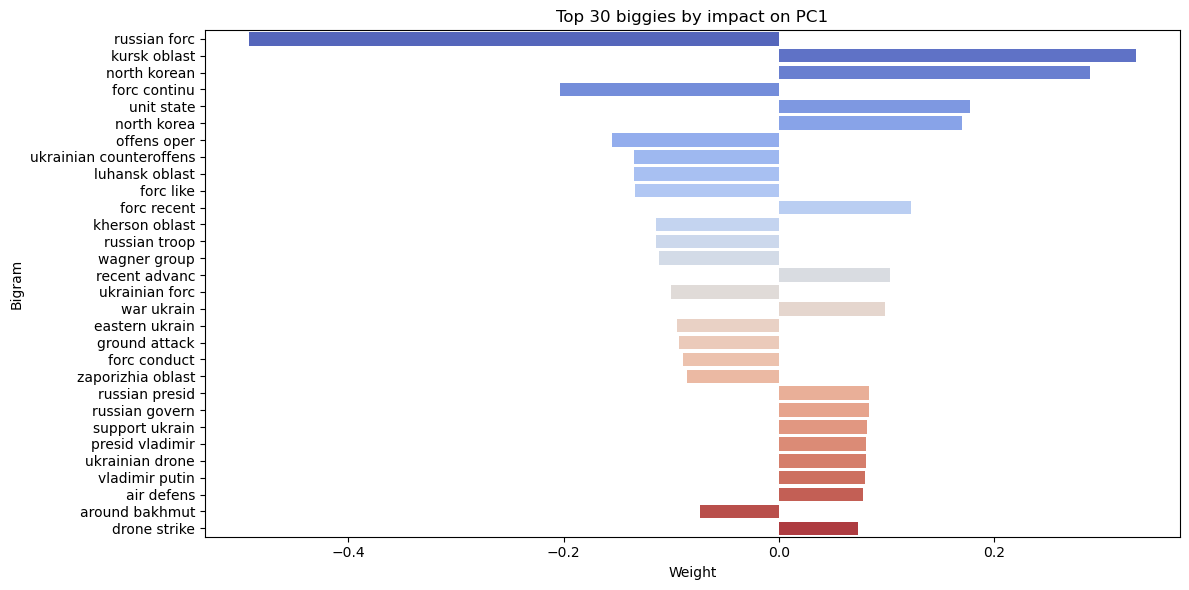

In [3]:
X = df_isw_tfidf.drop(columns=['date'], errors='ignore').values
feature_names = df_isw_tfidf.drop(columns=['date'], errors='ignore').columns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

top_n = 200
pc1_weights = pca.components_[0]
pc1_top_indices = np.argsort(np.abs(pc1_weights))[::-1][:top_n]
df_top_pc1 = pd.DataFrame({
    'bigram': feature_names[pc1_top_indices],
    'PC1_weight': pc1_weights[pc1_top_indices]
})

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_pc1.head(30), y='bigram', x='PC1_weight', palette='coolwarm')
plt.title("Top 30 biggies by impact on PC1")
plt.xlabel("Weight")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

## Top 30 bigrams by impact on PC2

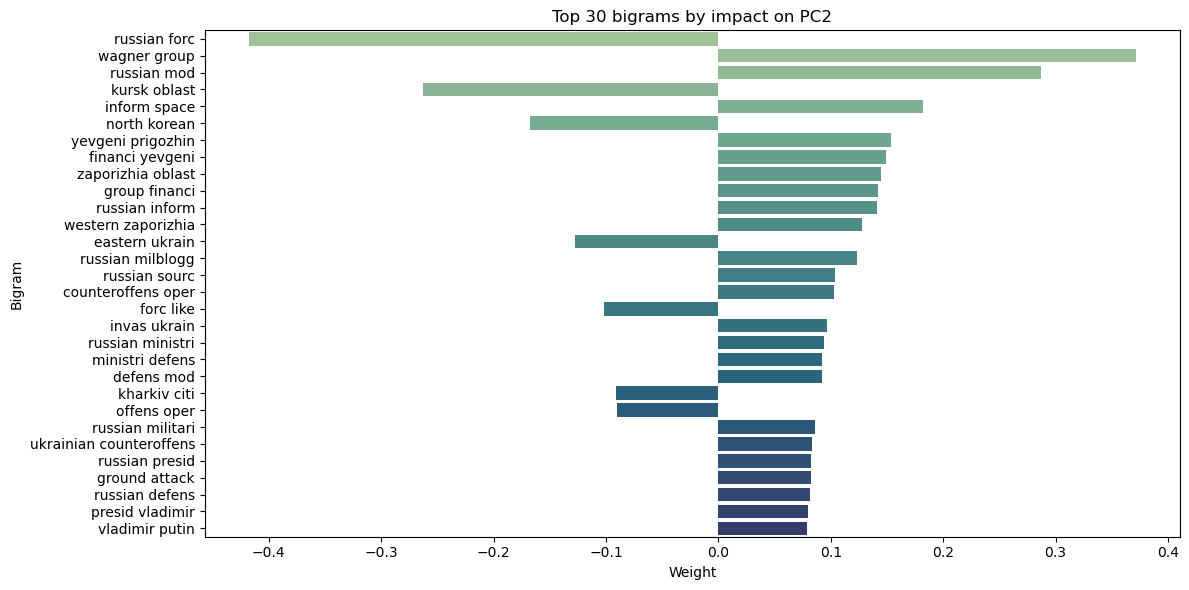

In [4]:
X = df_isw_tfidf.drop(columns=['date'], errors='ignore').values
feature_names = df_isw_tfidf.drop(columns=['date'], errors='ignore').columns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

top_n = 200
pc2_weights = pca.components_[1]
pc2_top_indices = np.argsort(np.abs(pc2_weights))[::-1][:top_n]
df_top_pc2 = pd.DataFrame({
    'bigram': feature_names[pc2_top_indices],
    'PC2_weight': pc2_weights[pc2_top_indices]
})

# Візуалізація
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_pc2.head(30), y='bigram', x='PC2_weight', palette='crest')
plt.title("Top 30 bigrams by impact on PC2")
plt.xlabel("Weight")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()